<h1 style="color: green;">Summary</h1>

<p>
The following tasks are accomplished in this section:
<ul>
<li>Balancing the data with imblearn</li>
<li>Hyperparameter tuning with GridSearchCV</li>
<li>Model comparison: imbalanced vs balanced </li>
<li>Final feature selection using selectfrom</li>
<li>Optimization and threshold tuning</li>
</ul>

</p>

<h1 style="color: green;">Import libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import time

# Imblearn for oversampling
from imblearn.over_sampling import SMOTE

# Scaling the values
from sklearn.preprocessing import binarize

# GridsearchCV
from sklearn.model_selection import GridSearchCV

# feature selection
from sklearn.feature_selection import SelectFromModel


# Cross validation score
from sklearn.model_selection import cross_val_score

# Metrics Accuracy
from sklearn.metrics import \
accuracy_score, confusion_matrix, recall_score, roc_curve,roc_auc_score

# joblib for storing models
import joblib

# feature importance
from sklearn.inspection import permutation_importance

# for deep copy
import copy


# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as rfc

# XGB.classifier
from xgboost import XGBClassifier as xgb

# Catboost
from catboost import CatBoostClassifier as catb

# LightGMB
from lightgbm import LGBMClassifier as lgbm

# Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier as gbc

# Adadboost classifier
from sklearn.ensemble import AdaBoostClassifier as adb

import warnings
warnings.filterwarnings('ignore')

<h1 style="color: green;">Import data</h1>

In [2]:
# import the data
X_train = pd.read_csv("../2. Data/homeshopping_classif_X_train.csv")
X_test = pd.read_csv("../2. Data/homeshopping_classif_X_test.csv")

In [3]:
# extracting y_train
y_train = X_train.target
X_train.drop(['target'], axis=1, inplace=True)
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: target, dtype: int64

In [4]:
# extracting y_test
y_test = X_test.target
X_test.drop(['target'], axis=1, inplace=True)
y_test.head()

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: int64

<h1 style="color: green;">Balancing the data with imblearn.over_sampling SMOTE </h1>

<P>
Binary classification models have a bias towards the majority target attribute.<br> 
This means that if the target distribution favours target = 0 then the model will learn to predict<br>
that attribute better than the target = 1 attribute. This effect is visible in the sensitivity and<br>
specificity of such models.
</P>
<p><b>
    Below resampling is performed using Imblearn oversampling with SMOTE.<br>
    SMOTE employes a nearest neighbour algorithm to generate/interpolate samples.<br>
    This introduces variability around the original data points being sampled such that<br>
    the model doesn't overfit the original data points
</b></p>

In [5]:
resamp = SMOTE(random_state=44)
X_train_resample, y_train_resample = resamp.fit_resample(X_train,y_train)

In [6]:
print(X_train_resample.shape)
X_train_resample.head()

(1018, 73)


,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_items_per_wk,Expenditure_per_wk,Total_Exp_wk_perc,AVG_exp_item_per_wk,hour,Bread_wk,Bread_exp_wk,...,Week_day_name_Friday,Week_day_name_Monday,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Evening,Part_of_day_Morning
0,0.086329,-0.236649,0.487672,-0.295981,-0.294171,-0.410729,-0.211435,-1.324821,2.398472,1.694186,...,-0.39654,-0.449260,-0.483241,-0.326219,-0.393958,2.680951,-0.426978,-0.974374,-0.393958,1.445553
1,-0.816953,-0.320357,-0.516810,0.983922,0.181543,-0.972653,-0.079624,0.450253,0.566403,-0.473094,...,-0.39654,-0.449260,-0.483241,3.065424,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777
2,1.170267,-0.134987,0.822500,-1.350020,-0.330668,0.465925,-0.161957,-0.310493,-0.349632,0.511028,...,-0.39654,-0.449260,-0.483241,-0.326219,-0.393958,-0.373002,2.342039,1.026300,-0.393958,-0.691777
3,-0.455640,-0.307790,-0.181982,0.758057,0.582345,-0.974993,0.086687,0.450253,0.566403,-0.473094,...,-0.39654,-0.449260,-0.483241,3.065424,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777
4,-0.274984,-0.184135,-0.516810,0.231038,-0.188122,-0.460624,-0.182369,0.703836,0.566403,-0.473094,...,-0.39654,2.225881,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777


In [7]:
print(y_train_resample.shape)
y_train_resample.value_counts()

(1018,)


0    509
1    509
Name: target, dtype: int64

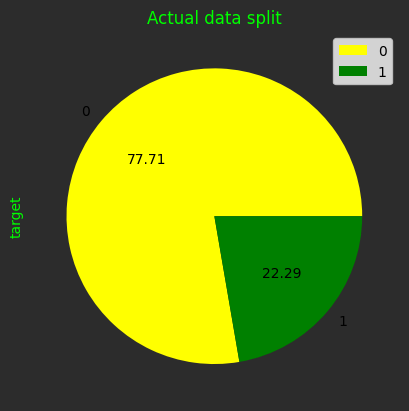

In [8]:
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

ax = y_train.value_counts().plot.pie(autopct='%.2f', colors=['yellow','green'])
_ = ax.set_title("Actual data split")
plt.legend()

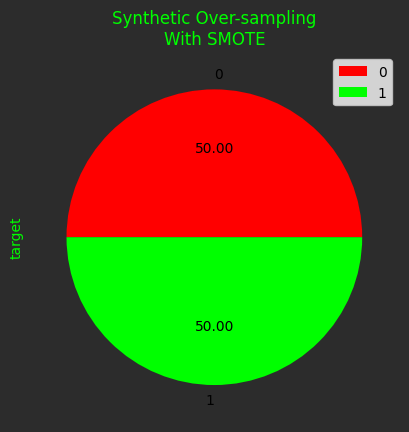

In [9]:
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

ax = y_train_resample.value_counts().plot.pie(autopct='%.2f', colors=['red','lime'])
_ = ax.set_title("Synthetic Over-sampling\nWith SMOTE")
plt.legend()

<p>
    As can be seen above, there is now an equal amount of target = 1 and target = 0<br>
    The dataset is now balanced

</p>

<h1 style="color: green;">Model building with GridSearchCV</h1>

In [10]:
keys = ['AdaBoost','Catboost','LightGBM','GradientBoosting','RandomForest','XGBoost']


models_list = {
    'AdaBoost': adb(),
    'Catboost': catb(),
    'LightGBM': lgbm(),
    'GradientBoosting': gbc(),
    'RandomForest': rfc(),
    'XGBoost':xgb()
}

param_list = {
    'AdaBoost': {
                'n_estimators': [100, 300, 500, 800, 1000],
                'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1, 0.15],
                'algorithm': ['SAMME', 'SAMME.R'],
                'random_state': [44]
    },
    
    'Catboost': {
                'n_estimators': [100, 300, 500, 1000],
                'depth': [4, 6, 8],
                'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1, 0.15],
                'loss_function': ['Logloss', 'CrossEntropy'],
                'verbose': [False],
                'random_seed': [44]
    },
    
    'LightGBM':{
                'n_estimators': [100, 300, 500, 800, 1000],
                'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1, 0.15],
                'max_depth': [4, 6, 8, 10],
    },
    
    'GradientBoosting': {
                'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1, 0.15],
                'n_estimators': [100, 300, 500, 800, 1000],
                'max_depth': [6, 8, 10],
                'random_state': [44]
    },
    
    'RandomForest': {
                'n_estimators': [100, 300, 400, 600, 800, 1000, 1300],
                'max_depth': [6, 8, 10, 12],
                'min_samples_split': [1, 3, 4, 6],
                'random_state': [44]
    },

    'XGBoost':{
                'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1, 0.15],
                'n_estimators': [100, 400, 700, 1000],
                'min_child_weight':[4,6,8],
                'max_depth':[4,6,8],
                'gamma':[0, 1],
    }
}


<h3 style="color: green;">GridSearch with imbalanced data</h3>
Note, below cross validation is employed as previously mentioned, the time series component of the<br>
data is ignored here. For a full explaination please see "Feature engineering/Classifier feature engineering.ipynb".

In [11]:
key_model_params = []
for key in keys:
    string = []
    string.append(key)
    string.append(param_list[key])
    
    start_time =  time.perf_counter()
    gs = GridSearchCV(models_list[key],param_grid=param_list[key],cv=5, verbose=True, n_jobs=-1)
    gs.fit(X_train,y_train)
    end_time = time.perf_counter()
    training_duration = end_time - start_time
    
    string.append(gs.best_params_)
    string.append(gs.best_score_)
    string.append(gs.score(X_test,y_test))
    string.append(training_duration)
    
    key_model_params.append(string)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 112 candidates, totalling 560 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [12]:
# GridSearch with imbalanced data output
GridSearchOutput = pd.DataFrame(key_model_params, columns =['Model','Param_list_in','best_params',
                                                            'best_score','score_x_y_test',
                                                            'Training_duration_seconds'])
GridSearchOutput.sort_values(by=['best_score','score_x_y_test'], ascending=False)

,Model,Param_list_in,best_params,best_score,score_x_y_test,Training_duration_seconds
2,LightGBM,"{'n_estimators': [100, 300, 500, 800, 1000], '...","{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",0.987786,0.996441,21.548759
0,AdaBoost,"{'n_estimators': [100, 300, 500, 800, 1000], '...","{'algorithm': 'SAMME.R', 'learning_rate': 0.15...",0.986260,0.985765,52.761906
3,GradientBoosting,"{'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1...","{'learning_rate': 0.03, 'max_depth': 6, 'n_est...",0.981679,0.985765,143.798425
1,Catboost,"{'n_estimators': [100, 300, 500, 1000], 'depth...","{'depth': 6, 'learning_rate': 0.08, 'loss_func...",0.981679,0.992883,1257.884081
5,XGBoost,"{'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1...","{'gamma': 0, 'learning_rate': 0.03, 'max_depth...",0.958779,0.992883,314.583220
4,RandomForest,"{'n_estimators': [100, 300, 400, 600, 800, 100...","{'max_depth': 12, 'min_samples_split': 1, 'n_e...",0.925191,0.911032,112.574353


<h3 style="color: green;">GridSearch with balanced data</h3>

In [13]:
key_model_params = []
for key in keys:
    string = []
    string.append(key)
    string.append(param_list[key])
    
    start_time =  time.perf_counter()
    gs = GridSearchCV(models_list[key],param_grid=param_list[key],cv=5, verbose=True, n_jobs=-1)
    gs.fit(X_train_resample,y_train_resample)
    end_time = time.perf_counter()
    training_duration = end_time - start_time
    
    string.append(gs.best_params_)
    string.append(gs.best_score_)
    string.append(gs.score(X_test,y_test))
    string.append(training_duration)
    
    key_model_params.append(string)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 112 candidates, totalling 560 fits
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [14]:
# GridSearch with balanced data output
GridSearchOutput_balanced = pd.DataFrame(key_model_params, columns =['Model','Param_list_in','best_params',
                                                            'best_score','score_x_y_test',
                                                            'Training_duration_seconds'])
GridSearchOutput_balanced.sort_values(by=['best_score','score_x_y_test'], ascending=False)

,Model,Param_list_in,best_params,best_score,score_x_y_test,Training_duration_seconds
1,Catboost,"{'n_estimators': [100, 300, 500, 1000], 'depth...","{'depth': 8, 'learning_rate': 0.03, 'loss_func...",0.996069,1.000000,2513.229930
2,LightGBM,"{'n_estimators': [100, 300, 500, 800, 1000], '...","{'learning_rate': 0.08, 'max_depth': 4, 'n_est...",0.991167,1.000000,43.921647
3,GradientBoosting,"{'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1...","{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.989196,0.971530,265.002701
0,AdaBoost,"{'n_estimators': [100, 300, 500, 800, 1000], '...","{'algorithm': 'SAMME.R', 'learning_rate': 0.15...",0.976446,0.989324,91.176969
5,XGBoost,"{'learning_rate': [0.01, 0.03, 0.06, 0.08, 0.1...","{'gamma': 0, 'learning_rate': 0.1, 'max_depth'...",0.975461,0.992883,521.317004
4,RandomForest,"{'n_estimators': [100, 300, 400, 600, 800, 100...","{'max_depth': 12, 'min_samples_split': 3, 'n_e...",0.974471,0.950178,143.330856


<p>
<b>Surprisingly XGBoost</b> is not the best performing model coming out of the gridsearch, <b>Catboost</b> is, followed by <b>LightGBM</b>;<br>
when considering test and training accuracy. Both models have perfect test scores. However, the remaining models aren't too<br> dissimilar in test performance.This is a good indicator for using a voting regressor on these high performing models.<br><br>
Note, lightGBM was the best model using the imbalanced data with a train accuracy of 0.988 and a test accuracy of 0.996;<br> with the balanced data, lightGBM comes in second place with an improvement in train score of 0.991 and a perfect test score, 1.0 .<br>
In general, all models exhibit improved train and test scores when using balanced data.<br>
This demonstrates the superiority of modelling with balanced data i.e. the model is able to accurately classify<br>the target attributes with less bias, if any towards the target = 0 class.
</p>

<h1 style="color: green;">Comparing the best models for balanced and imbalanced data</h1>

<p>The GridSearchCV hyperparameter tuning used CV = 5. In comparing the best models, below we use cv=10 i.e more <br>subsampling folds for training the best model. Then a decision can be made as to the best model to proceed with.<br><br>
<b>This approach is taken because cross validation with 10 folds is considered a more rigorous representation of the <br>model's performance on unseen data.</b></p>

<h3 style="color: green;">Imbalanced data best model</h3>

<h5 style="color: green;">LightGBM best parameters for imbalanced data</h5>

In [15]:
# Retrieving the best parameters for LightGBM
GridSearchOutput['best_params'][2]

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1000}

In [16]:
# instantiate the model, lightGBM
lgbm_imb = lgbm(
    learning_rate = 0.03,
    max_depth = 4,
    n_estimators = 1000
)

# fit the model with cross validation
lgbm_imb.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.03, max_depth=4, n_estimators=1000)

<h5 style="color: green;">lightGBM Model accuracy</h5>

In [17]:
# Checking the train accuracy of the model
lgbm_imb.score(X_train,y_train)

1.0

In [18]:
# Checking the test accuracy of the model
lgbm_imb.score(X_test,y_test)

0.99644128113879

In [19]:
# Cross validation train score
score = cross_val_score(lgbm_imb, X_train, y_train, cv=10)
accuracy = score.mean()
accuracy

0.9908624708624709

<h5 style="color: green;">CatBoost best parameters for imbalanced data</h5>

In [20]:
# Retrieving the best parameters for 1 Catboost
GridSearchOutput['best_params'][1]

{'depth': 6,
 'learning_rate': 0.08,
 'loss_function': 'Logloss',
 'n_estimators': 500,
 'random_seed': 44,
 'verbose': False}

<h5 style="color: green;">XGBoost best parameters for imbalanced data</h5>

In [21]:
# Retrieving the best parameters for 5 xgboost
GridSearchOutput['best_params'][5]

{'gamma': 0,
 'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 700}

<h5 style="color: green;">AdaBoost best parameters for imbalanced data</h5>

In [22]:
# Retrieving the best parameters for 0 Adaboost
GridSearchOutput['best_params'][0]

{'algorithm': 'SAMME.R',
 'learning_rate': 0.15,
 'n_estimators': 1000,
 'random_state': 44}

<h5 style="color: green;">GradientBoosting best parameters for imbalanced data</h5>

In [23]:
# Retrieving the best parameters for 3 Gradient boost
GridSearchOutput['best_params'][3]

{'learning_rate': 0.03,
 'max_depth': 6,
 'n_estimators': 800,
 'random_state': 44}

<h5 style="color: green;">RandomForest best parameters for imbalanced data</h5>

In [24]:
# Retrieving the best parameters for 4 Random forest
GridSearchOutput['best_params'][4]

{'max_depth': 12,
 'min_samples_split': 1,
 'n_estimators': 400,
 'random_state': 44}

<h3 style="color: green;">Imbalanced models cross validation cv = 10</h3>

In [25]:
keys1 = ['AdaBoost','Catboost','LightGBM','GradientBoosting','RandomForest','XGBoost']


models_list1 = {
    'AdaBoost': adb(
            n_estimators = 1000,
            learning_rate = 0.15,
            algorithm = 'SAMME.R',
            random_state = 44        
    ),
    'Catboost': catb(
            depth = 6,
            learning_rate = 0.08,
            loss_function = 'Logloss',
            n_estimators = 500,
            random_seed = 44,
            verbose = False
    ),
    
    'LightGBM': lgbm(
            learning_rate = 0.03,
            max_depth = 4,
            n_estimators = 1000
    ),
    
    'GradientBoosting': gbc(
            n_estimators = 800,
            learning_rate = 0.03,
            max_depth = 6,
            random_state = 44        
    ),
    
    'RandomForest': rfc(
            n_estimators = 400,
            min_samples_split = 1,
            max_depth = 12,
            random_state = 44        
    ),
    'XGBoost':xgb(
            n_estimators = 700,
            learning_rate = 0.03,
            gamma = 0,
            max_depth = 6,
            min_child_weight = 4
    )
}


In [26]:
key_model_params1 = []
for key in keys1:
    string = []
    
    gs = models_list1[key]
    gs.fit(X_train,y_train)
    train_score = gs.score(X_train, y_train)    
    test_score = gs.score(X_test, y_test)
    score_cv = cross_val_score(gs, X_train, y_train, cv=10)
    accuracy_cv = score_cv.mean()
    
    string.append(key)
    string.append(train_score)
    string.append(test_score)
    string.append(accuracy_cv)
    
    
    key_model_params1.append(string)

In [27]:
Cv_10_imbalanced = pd.DataFrame(key_model_params1, 
                                columns =['Model',
                                          'train_score',
                                          'test_score',
                                          'cv_10_score'])

Cv_10_imbalanced.sort_values(by=['cv_10_score',
                                  'test_score',
                                  'train_score'], 
                                  ascending=False)

,Model,train_score,test_score,cv_10_score
2,LightGBM,1.0,0.996441,0.990862
0,AdaBoost,1.0,0.985765,0.990862
3,GradientBoosting,1.0,0.985765,0.990839
1,Catboost,1.0,0.992883,0.986294
5,XGBoost,1.0,0.992883,0.963403
4,RandomForest,1.0,0.911032,0.925152


<h1 style="color: green;">Balanced data best models</h1>

<h5 style="color: green;">CatBoost best parameters for balanced data</h5>

In [28]:
# Retrieving the best parameters for Catboost
GridSearchOutput_balanced['best_params'][1]

{'depth': 8,
 'learning_rate': 0.03,
 'loss_function': 'Logloss',
 'n_estimators': 500,
 'random_seed': 44,
 'verbose': False}

<h5 style="color: green;">LightGBM best parameters for balanced data</h5>

In [29]:
# Retrieving the best parameters for 2 Lightgbm
GridSearchOutput_balanced['best_params'][2]

{'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 500}

<h5 style="color: green;">XGBoost best parameters for balanced data</h5>

In [30]:
# Retrieving the best parameters for 5 XGBoost
GridSearchOutput_balanced['best_params'][5]

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 100}

<h5 style="color: green;">AdaBoost best parameters for balanced data</h5>

In [31]:
# Retrieving the best parameters for 0 Adaboost
GridSearchOutput_balanced['best_params'][0]

{'algorithm': 'SAMME.R',
 'learning_rate': 0.15,
 'n_estimators': 1000,
 'random_state': 44}

<h5 style="color: green;">GradientBoosting best parameters for balanced data</h5>

In [32]:
# Retrieving the best parameters for 3 Gradient Boost
GridSearchOutput_balanced['best_params'][3]

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'random_state': 44}

<h5 style="color: green;">RandomForest best parameters for balanced data</h5>
Since RandomForest classifier is the worst performing model, it will be used below for demonstrating threshold tuning

In [33]:
# Retrieving the best parameters for 4 Random forest
GridSearchOutput_balanced['best_params'][4]

{'max_depth': 12,
 'min_samples_split': 3,
 'n_estimators': 300,
 'random_state': 44}

<h3 style="color: green;">Balanced data models cross validation cv = 10</h3>

In [34]:
keys1b = ['AdaBoost','Catboost','LightGBM','GradientBoosting',
          'RandomForest','XGBoost']


models_list1b = {
    'AdaBoost': adb(
            n_estimators = 1000,
            learning_rate = 0.15,
            algorithm = 'SAMME.R',
            random_state = 44      
    ),
    'Catboost': catb(
            depth = 8,
            learning_rate = 0.08,
            loss_function = 'Logloss',
            n_estimators = 500,
            random_seed = 44,
            verbose = False
    ),
    
    'LightGBM': lgbm(
            n_estimators = 500,
            learning_rate = 0.08,
            max_depth = 4
    ),
    
    'GradientBoosting': gbc(
            n_estimators = 300,
            learning_rate = 0.1,
            max_depth = 6,
            random_state = 44       
    ),
    
    'RandomForest': rfc(
            n_estimators = 300,
            max_depth = 12,
            min_samples_split = 3,
            random_state = 44     
    ),
    'XGBoost':xgb(
            n_estimators = 100,
            learning_rate = 0.1,
            max_depth = 6,
            min_child_weight = 4,
            gamma = 0
    )
}

In [35]:
key_model_params1b = []
for key in keys1b:
    string = []
    
    gs = models_list1b[key]
    gs.fit(X_train_resample,y_train_resample)
    train_score = gs.score(X_train_resample,y_train_resample)    
    test_score = gs.score(X_test, y_test)
    score_cv = cross_val_score(gs, X_train_resample,y_train_resample, cv=10)
    accuracy_cv = score_cv.mean()
    
    string.append(key)
    string.append(train_score)
    string.append(test_score)
    string.append(accuracy_cv)    
    
    key_model_params1b.append(string)

In [36]:
Cv_10_balanced = pd.DataFrame(key_model_params1b, 
                                columns =['Model',
                                          'train_score',
                                          'test_score',
                                          'cv_10_score'])

Cv_10_balanced.sort_values(by=['cv_10_score',
                                'test_score',
                                'train_score'], 
                                ascending=False)

,Model,train_score,test_score,cv_10_score
1,Catboost,1.0,1.000000,0.998039
2,LightGBM,1.0,1.000000,0.996078
3,GradientBoosting,1.0,0.971530,0.992147
0,AdaBoost,1.0,0.989324,0.984304
5,XGBoost,1.0,0.992883,0.979383
4,RandomForest,1.0,0.950178,0.978383


<p>
<b>Imbalanced data models ranking</b><br>
The ranking (cv=5 score) was:
<h4 style="color: red;">
$\begin {bmatrix} Model & cv = 5 score 
\\ LightGBM  & 0.988 
\\ AdaBoost & 0.986
\\ GradientBoosting  & 0.982
\\ CatBoost & 0.982
\\ XGBoost  & 0.959
\\ RandomForest & 0.925
\end{bmatrix}$
</h4>

After 10 fold cross-validation it is now (cv=10 score): <br>
<h4 style="color: green;">
$\begin {bmatrix} Model & cv = 10 score 
\\ LightGBM  & 0.991 
\\ AdaBoost & 0.991
\\ GradientBoost  & 0.991 
\\ CatBoost & 0.986
\\ XGBoost  & 0.963 
\\ RandomForest & 0.925
\end{bmatrix}$
</h4>

Contrary to expectation all the models except the RandomForest model have improved scores with cv = 10 in <br>
comparison to cv = 5 for the imbalanced data
</p>

<p>
<b>Balanced data models ranking</b><br><br>
The ranking (cv=5 score):
<h4 style="color: red;">
$\begin {bmatrix} Model & cv = 5 score 
\\ CatBoost  & 0.996 
\\ LightGBM & 0.991
\\ GradientBoosting  & 0.989 
\\ AdaBoost & 0.976
\\ XGBoost  & 0.975 
\\ RandomForest & 0.974
\end{bmatrix}$
</h4>

The ranking (cv = 10 score) 		
<h4 style="color: green;">
$\begin {bmatrix} Model & cv = 10 score 
\\ CatBoost  & 0.998 
\\ LightGBM & 0.996
\\ GradientBoosting  & 0.992 
\\ AdaBoost & 0.984
\\ XGBoost  & 0.979 
\\ RandomForest & 0.978
\end{bmatrix}$
</h4>

The balanced data models all exhibit an improvement in cross validation score irrespective of cv = 5 or cv = 10. <br>This is a clear indication of the superiority of balancing the data.<br><br>
We will proceed to model evaluation with CatBoost since CatBoost is the best model by cv = 10 score (balanced data).<br>
Given that the RandomForest model is the weakest, it will be used to illustrate the process of threshold tuning<br>in situations where model performance is less than perfect.
</p>

<h3 style="color: green;">Feature importance for Catboost classifier</h3>

In [38]:
catb_b= catb(
            depth = 8,
            learning_rate = 0.08,
            loss_function = 'Logloss',
            n_estimators = 500,
            random_seed = 44,
            verbose = False
    )

catb_b.fit(X_train_resample,y_train_resample)

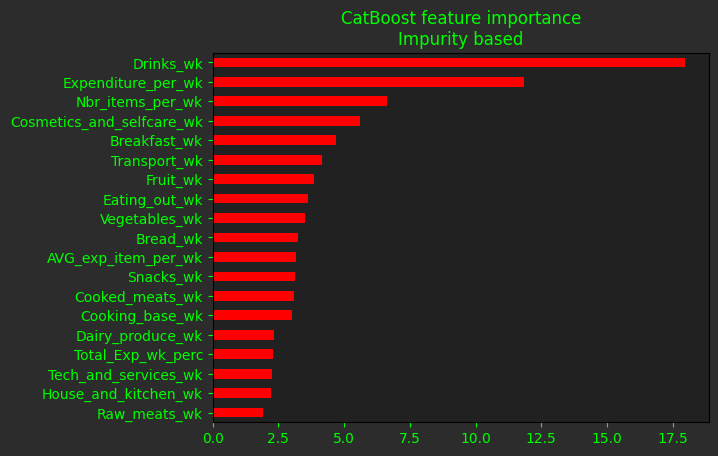

In [39]:
catb_clfier_imp = pd.Series(catb_b.feature_importances_, 
                    index=X_train.columns)

# plotting importance
# figure background
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')


catb_clfier_imp.nlargest(19).sort_values().plot(ax=ax,
                                        kind='barh', 
                                        color='red',
                                        title='CatBoost feature importance\nImpurity based')
plt.show()

<h1 style="color: green;">Evaluating the best model (CatBoost)</h1>

<p>
Below a comparison is made between CatBoost imbalanced data and CatBoost balanced data model.<br><br>
Since the objective is to determine whether I will have less than 5 shopping trips in a week,<br>
the aim is to optimize the model for sensitivity i.e. to maximise the correct predictions of<br>
less than 5 shopping trips in a week, true positives, while minimizing false negatives,<br>
the model incorrectly predicts more than four shopping trips a week.<br><br>
The aim is that the comparison will illustrate the advantage of using balanced data over imbalanced data.
</p>

<h3 style="color: green;">Retrieving the models</h3>
<p style="color:red;">Model A: imbalanced data CatBoost model</p>

In [40]:
catb_imb = catb(
            depth = 6,
            learning_rate = 0.08,
            loss_function = 'Logloss',
            n_estimators = 500,
            random_seed = 44,
            verbose = False
    )

catb_imb.fit(X_train, y_train)

<p style="color:red;">Model B: SMOTE balanced data CatBoost model</p>

In [41]:
catb_b

<h3 style="color: green;">Confusion matrix</h3>

<h1>
$\begin {bmatrix} Sample size=n & Predicted: 0 & Predicted: 1 
\\ Actual: 0 & TN & FP 
\\ Actual: 1 & FN & TP  
\end{bmatrix}$
</h1>

<ul style="color: black;">
<b style="color: green;">Basic terminolgy:</b>
<li><b>True positive(TP): </b> we correctly predicted that they do have the condition</li>
<li><b>True negatives(TN): </b> we correctly predicted that they don't have the condition</li>
<li><b>False positive (FP):</b> we incorrectly predicted that they do have the condition ( a <b>"Type I error"</b>)</li>
<li><b>False negatives (FN):</b> we incorrectly predicted that they don't have the condition (a <b>"Type II error"</b>)</li>
</ul>

<p style="color: red;">Model A</p>

In [49]:
mA_y_pred = catb_imb.predict(X_test)
mA_y_pred.shape

(281,)

In [50]:
y_test.shape

(281,)

In [51]:
mA_confusion_matrix = confusion_matrix(y_test,mA_y_pred)
mA_confusion_matrix

array([[208,   0],
       [  2,  71]])

<h1>
$\begin {bmatrix} n=281 & Predicted: 0 & Predicted: 1 & Totals
\\ Actual: 0 & 208 & 0 & 208
\\ Actual: 1 & 2 & 71  & 73
\\ Totals: & 210 & 71 & 281
\end{bmatrix}$
</h1>

In [45]:
# unraveling the confusion matrix
mA_tn,mA_fp,mA_fn,mA_tp = confusion_matrix(y_test,mA_y_pred).ravel()

<p style="color: red;">Model B</p>

In [53]:
mB_y_pred = catb_b.predict(X_test)
mB_y_pred.shape

(281,)

In [54]:
y_test.shape

(281,)

In [55]:
mB_confusion_matrix = confusion_matrix(y_test,mB_y_pred)
mB_confusion_matrix

array([[208,   0],
       [  0,  73]])

<h1>
$\begin {bmatrix} n=281 & Predicted: 0 & Predicted: 1 & Totals
\\ Actual: 0 & 208 & 0 & 208
\\ Actual: 1 & 0 & 73  & 73
\\ Totals: & 208 & 73 & 281
\end{bmatrix}$
</h1>

In [62]:
# unraveling the confusion matrix
mB_tn,mB_fp,mB_fn,mB_tp = confusion_matrix(y_test,mB_y_pred).ravel()

<p style="color: black;">
Model A confusion matrix has 2 false negatives and no false positives while model B has perfect classification; zero false negatives and zero false positives.<br>This emphasizes the superiority of balancing the data i.e. it improves the classification accuracy of the would be minority target group, reduces false negatives.
</p>
<br>
<b>Below we continue with the balanced data CatBoost model and the RandomForest for demonstrating augmenting models when the performance is less than perfect.</b>

<p style="color: red;">Model C</p>

In [56]:
# RandomForest fitted with balanced data
rfc_b =  rfc(
            n_estimators = 300,
            max_depth = 12,
            min_samples_split = 3,
            random_state = 44     
    )

rfc_b.fit(X_train_resample,y_train_resample)

RandomForestClassifier(max_depth=12, min_samples_split=3, n_estimators=300,
                       random_state=44)

In [57]:
mC_y_pred = rfc_b.predict(X_test)
mC_y_pred.shape

(281,)

In [59]:
mC_confusion_matrix = confusion_matrix(y_test,mC_y_pred)
mC_confusion_matrix

array([[206,   2],
       [ 12,  61]])

<h1>
$\begin {bmatrix} n=281 & Predicted: 0 & Predicted: 1 & Totals
\\ Actual: 0 & 206 & 2 & 208
\\ Actual: 1 & 12 & 61  & 73
\\ Totals: & 218 & 63 & 281
\end{bmatrix}$
</h1>

<b>The confusion matrix shows relatively more false negatives and false positives in comparison to model B</b>

In [60]:
# unraveling the confusion matrix
mC_tn,mC_fp,mC_fn,mC_tp = confusion_matrix(y_test,mC_y_pred).ravel()

<h3 style="color: green;">Sensitivity(recall): when the actual value is positive,how often is the prediction correct</h3>

<p style="color: red;">Model B</p>

In [66]:
mB_sensitivity = recall_score(y_test,mB_y_pred)
print("Model B sensitivity via recall_score: {}".format(mB_sensitivity))

print("Model B manually calculated sensitivity: {}".format(mB_tp /(mB_tp + mB_fn)))

Model B sensitivity via recall_score: 1.0
Model B manually calculated sensitivity: 1.0


<p style="color: red;">Model C</p>

In [67]:
mC_sensitivity = recall_score(y_test,mC_y_pred)
print("Model C sensitivity via recall_score: {}".format(mC_sensitivity))

print("Model C hand manually calculated sensitivity: {}".format(mC_tp /(mC_tp + mC_fn)))

Model C sensitivity via recall_score: 0.8356164383561644
Model C hand manually calculated sensitivity: 0.8356164383561644


As can be seen, model C recall/sensitivity is much lower than model B.

<h3 style="color: green;">Specificity: When the actual value is negative, how often is the prediction correct</h3>

<p style="color: red;">Model B</p>

In [68]:
mB_Specificity = mB_tn/(mB_tn + mB_fp)
print("Model 2 specificity: {}".format(mB_Specificity))

Model 2 specificity: 1.0


<p style="color: red;">Model C</p>

In [69]:
mC_Specificity = mC_tn/(mC_tn + mC_fp)
print("Model 3 specificity: {}".format(mC_Specificity))

Model 3 specificity: 0.9903846153846154


Yet again model B has superior outcome with a specificity of 1 while model C lags behind with a relatively lower 0.99 .

Model B has perfect sensitivity and specificity

Model C, however, has higher specificity than sensitivity. This means the model predicts negative<br>
instances better than it does positive instances i.e. the model is better at telling when<br>
I'm going to have more than 4 shopping trips in a week than when I'm going to have 4 <br>
or less shopping trips in a week.

<h3 style="color: green;">Precision: when a positive value is predicted, how often is the prediction correct</h3>

<p style="color: red;">Model B</p>

In [71]:
mB_precision = mB_tp / (mB_tp + mB_fp)
print("Model C precision: {}".format(mB_precision))

Model C precision: 1.0


<p style="color: red;">Model C</p>

In [72]:
mC_precision = mC_tp / (mC_tp + mC_fp)
print("Model C precision: {}".format(mC_precision))

Model C precision: 0.9682539682539683


In [73]:
# calculating the precision percentage difference between model B and model C
(1.0 - 0.9682539682539683)/0.9682539682539683

0.032786885245901634

<p style="color: black;">
It must be noted that model C has a very high precision: the proportion of the true<br> 
positive rates is higher than false positive rates for the RandomForest model,<br>
Model B has a 3% lead on precision: a reflection on the power of model B in distinguishing between the target attributes. 
</p>

<p>
Thus final model feature selection and threshold tuning will be done with the best balanced data model, CatBoost.<br>
<b>The random forest model will be used to illustrate better the effects of threshold tuning for operational use.</b>
</p>

<h1 style="color: green;">Final model feature selection</h1>

In [75]:
# shape of X_train_resample before final feature selection
X_train_resample.shape

(1018, 73)

In [76]:
# select features using the importance derived from XGBoost
sel_ = SelectFromModel(catb(
                    depth = 8,
                    learning_rate = 0.08,
                    loss_function = 'Logloss',
                    n_estimators = 500,
                    random_seed = 44,
                    verbose = False
            ))

sel_.fit(X_train_resample, y_train_resample)

# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_catb = pd.DataFrame(sel_.transform(X_train_resample))
X_test_catb = pd.DataFrame(sel_.transform(X_test))

# add the columns name
X_train_catb.columns = X_train_resample.columns[(sel_.get_support())]
X_test_catb.columns = X_test.columns[(sel_.get_support())]

In [77]:
X_train_catb.shape,X_test_catb.shape

((1018, 20), (281, 20))

In [78]:
# features remaining in the model
X_train_catb.columns

Index(['Date_diff', 'Nbr_items_per_wk', 'Expenditure_per_wk',
       'Total_Exp_wk_perc', 'AVG_exp_item_per_wk', 'Bread_wk',
       'Cooked_meats_wk', 'Raw_meats_wk', 'Eating_out_wk', 'Snacks_wk',
       'Drinks_wk', 'Vegetables_wk', 'Fruit_wk', 'Cooking_base_wk',
       'Dairy_produce_wk', 'Breakfast_wk', 'Transport_wk',
       'Tech_and_services_wk', 'Cosmetics_and_selfcare_wk',
       'House_and_kitchen_wk'],
      dtype='object')

<h3 style="color: green;">Re-running the model with final features</h3>

In [79]:
# instantiate the model

catb_clfier_final_features = catb(
                    depth = 8,
                    learning_rate = 0.08,
                    loss_function = 'Logloss',
                    n_estimators = 500,
                    random_seed = 44,
                    verbose = False
                )

# Fitting the model
catb_clfier_final_features.fit(X_train_catb,y_train_resample)

In [80]:
# Cross validation train score
score = cross_val_score(catb_clfier_final_features, X_train_catb,y_train_resample, cv=10)
accuracy = score.mean()
accuracy

0.9990196078431373

In [81]:
# Comparison with the previous CatBoost model
# Cross validation train accuracy score
score = cross_val_score(catb_b, X_train_resample,y_train_resample, cv=10)
accuracy = score.mean()
accuracy

0.9980392156862745

In [82]:
#  Checking the shape of X_train_resample to indicate the number of 
# features that went into the balanced data model, 76
X_train_resample.shape

(1018, 73)

In [83]:
# percentage change in accuracy from balanced data model to final feature model
(0.9990196078431373-0.9980392156862745)/0.9980392156862745

0.0009823182711198393

There is hardly any difference in 10 fold cross validation score between the final features model and the best model coming out of GridSearchCV.

In [85]:
# Test accuracy score for final features model
catb_clfier_final_features.score(X_test_catb,y_test)

1.0

In [86]:
# Test accuracy score for balanced data catboost model
catb_b.score(X_test, y_test)

1.0

Both the models have perfect test accuracy scores, so no change there.

In [87]:
# percentage change in the number of features
(76 - 20)/76

0.7368421052631579

<p>
The feature selection has reduced the number of features by 73% with very little change in accuracy;<br> surprisingly there is a slight improvement in cross validated accuracy and no change in test accuracy, 1.0 for both models;<br> while improving the efficiency, parsimony, for deployment.
</p>

<h3 style="color: green;">Final model feature selection importance</h3>

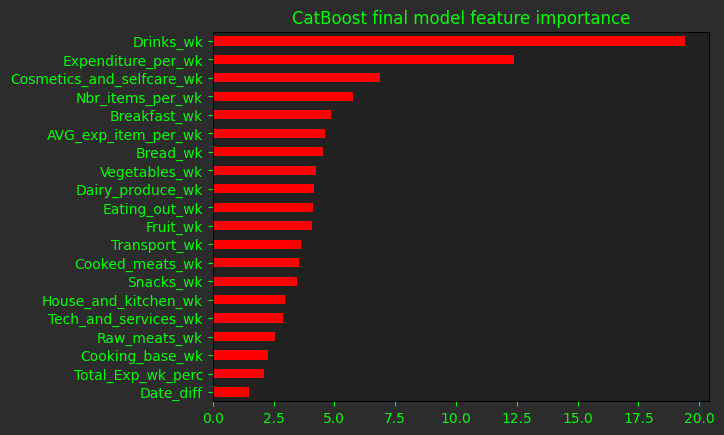

In [88]:
catb_clfier_final_features_imp = pd.Series(catb_clfier_final_features.feature_importances_, 
                    index=X_train_catb.columns)

# plotting importance
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')


catb_clfier_final_features_imp.nlargest(31).sort_values().plot(ax=ax,
                                        kind='barh', 
                                        color='red',
                                        title='CatBoost final model feature importance')
plt.show()

<h1 style="color: green;">Extracting X_train, X_test, for Explainable AI with SHAP</h1>

In [89]:
X_train_ = copy.deepcopy(X_train_catb)
X_test_ = copy.deepcopy(X_test_catb)

# Export the data
X_train_.to_csv("../2. Data/Classif_X_train_Shap.csv",index=False)
X_test_.to_csv("../2. Data/Classif_X_test_Shap.csv",index=False)

<h1 style="color: green;">Extracting X_test_catb,y_test for final model evaluation</h1>

In [90]:
X_test_catb_ = copy.deepcopy(X_test_catb)
X_test_catb_['target'] = y_test

X_test_catb_.to_csv("../2. Data/Classif_X_test_catb.csv",index=False)

<h1 style="color: green;">Extracting X_test, y_test for Random forest evaluation</h1>

In [91]:
X_test_rfc = copy.deepcopy(X_test)
X_test_rfc['target'] = y_test

X_test_rfc.to_csv("../2. Data/Classif_X_test_rfc.csv",index=False)

<h1 style="color: green;">Saving the best model and the Random forest model for evaluation</h1>

In [92]:
joblib.dump(catb_clfier_final_features,'../8. Models/Classifier_models/catboost_classifier14082023')

joblib.dump(rfc_b,'../8. Models/Classifier_models/random_forest_classifier14082023')

['../8. Models/Classifier_models/random_forest_classifier14082023']

<h1 style="color: green;">Conclusion</h1>
The superiority of balancing the data for modelling has been sufficiently demonstrated. 
This, coupled with highly predictive features and a powerful algorithm hyperparameter tuning 
will result in a very powerful highly accurate model.